#### Data Import 

In [1]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

#
# Leslie Amper
#### Entity ID : b6f086e1-56d8-4bd3-b6ff-1f01cf9c533c

In [2]:
entity_id = 'b6f086e1-56d8-4bd3-b6ff-1f01cf9c533c'

## Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
88062,b6f086e1-56d8-4bd3-b6ff-1f01cf9c533c,Leslie Amper,NaN,True,NaN,NaN,NaN


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
88062,3,10,0,1,2,0


## 1 - Performances 

In [5]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs.head(10)

,date,venue,country,city,title,key,continent
11507,1989-07-12 20:00:00.000000,Main Hall,United States of America,NaN,"Landmark Jazz Concerts: George Antheil ""The Ba...",NaN,North America
32795,1986-04-13 14:00:00.000000,Carnegie Recital Hall,United States of America,NaN,Leslie Amper,NaN,North America
39846,1989-07-12 20:00:00.000000,Main Hall,United States of America,NaN,"Landmark Jazz Concerts: George Antheil ""The Ba...",NaN,North America


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
5309,Wolfgang Amadeus Mozart (1756—1791),"Rondo in A Minor, K. 511 (1787)",16
10147,Ludwig van Beethoven (1770—1827),"Variations on a Waltz by Diabelli in C Major, ...",16
10806,Charles T. Griffes (1884—1920),Piano Sonata (1917-1918),16
11285,George Antheil (1900—1959),Ballet mécanique (1923-1925),16
14370,Olivier Messiaen (1908—1992),Vingt regards sur l'Enfant-Jésus: 11. Première...,16
15031,Olivier Messiaen (1908—1992),Vingt regards sur l'Enfant-Jésus: 5. Regard du...,16
17608,Olivier Messiaen (1908—1992),Vingt regards sur l'Enfant-Jésus: 12. La parol...,16
24932,George Antheil (1900—1959),"Sonata No. 2 for Violin, Piano, and Drums (1923)",16
24933,George Antheil (1900—1959),String Quartet No. 1 (1924),16
24934,George Antheil (1900—1959),A Jazz Symphony (1925),16


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text


In [8]:
# One example of media mentions
if len(df_medias) > 0 : 
    print(df_medias.iloc[0].comparable_text)

## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date


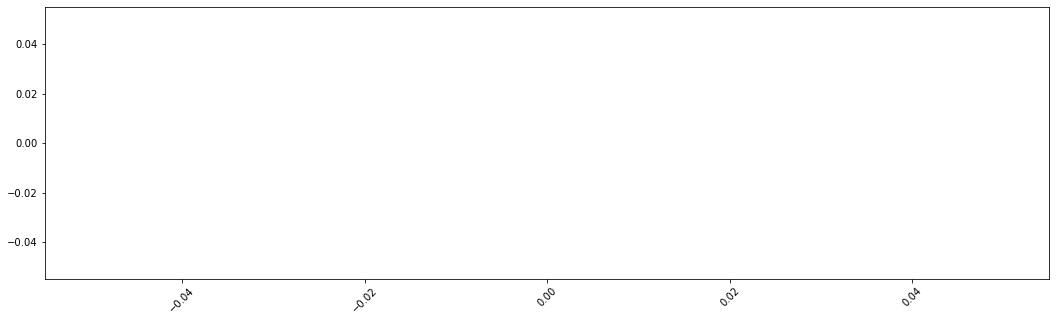

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
56,Pianist


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['leslie amper', 'amper leslie']]

## 7 - Biographies 

In [13]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']]

,detail,year,source


In [14]:
# One bography example 
if len(df_bios) > 0 : 
    print(df_bios.iloc[0].detail)